# 3. Video

In this example, I will create video that shows the process that the `clean` gradually removes sidelobes.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

current_dir = os.getcwd()

if 'google.colab' in sys.modules:
    !git clone https://github.com/skrbcr/interferometry_clean_sim.git
    %cd interferometry_clean_sim/example
    sys.path.append('/content/interferometry_clean_sim/')
    current_dir += '/interferometry_clean_sim/example/'
else:
    sys.path.append(os.path.dirname(current_dir))

from CLEAN import CLEAN

In [2]:
imagefile = f'{current_dir}/image/structure.png'  # true target image
maskfile = f'{current_dir}/image/structure_mask.png'  # mask image
N_antennas = 20  # number of antennas

In [3]:
clean = CLEAN()  # CLEAN class
antenna_pos, uv_coverage = clean.set_antenna_array(geometry='random', n_antennas=N_antennas, b_min=0.01)
vis, imsize = clean.create_visibility(imagefile=imagefile)

PSF created.
Iteration 13: Peak value 0.09832864593820505 is below threshold 0.1. Stopping the iteration.
PSF created.
Iteration 13: Peak value 0.09832864593820505 is below threshold 0.1. Stopping the iteration.
PSF created.
Iteration 30: Peak value 0.08055074275388908 is below threshold 0.08286427728546843. Stopping the iteration.
PSF created.
Iteration 54: Peak value 0.06765718908533672 is below threshold 0.06866488450043001. Stopping the iteration.
PSF created.
Iteration 83: Peak value 0.056373758400488756 is below threshold 0.05689866029018296. Stopping the iteration.
PSF created.
Iteration 121: Peak value 0.04678154965848394 is below threshold 0.04714866363457394. Stopping the iteration.
PSF created.
Iteration 158: Peak value 0.039052597185028244 is below threshold 0.03906939937054617. Stopping the iteration.
PSF created.
Iteration 210: Peak value 0.03234217051062657 is below threshold 0.032374575428176434. Stopping the iteration.
PSF created.
Iteration 263: Peak value 0.026376122

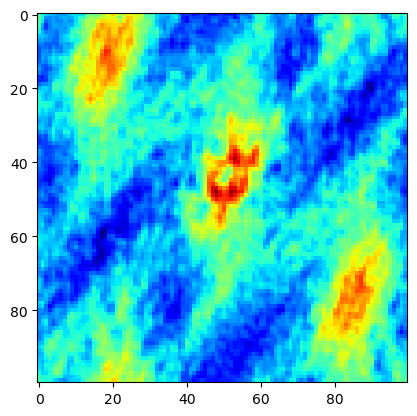

In [4]:
thresholds = np.logspace(np.log10(0.1), np.log10(1e-5), num=50)

fig, ax = plt.subplots()

def update(frame):
    _, _, _, image = clean.clean(vis=vis, imsize=imsize, weighting='uniform', n_iter=100000, threshold=thresholds[frame], mask=maskfile)
    im = ax.imshow(image, cmap='jet')

ani = FuncAnimation(fig, update, frames=len(thresholds), interval=200)
ani.save('3_video.mp4')

Open the video file and watch as the sidelobes are beging removed.